This cell imports the required Python libraries for data handling, visualization, model building, and evaluation.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay



This cell loads the Breast Cancer dataset from the UCI repository and stores it in a pandas DataFrame.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None)
columns = ['ID','Diagnosis', 'radius1','texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1','symmetry1','fractal_dimension1', 'radius2','texture2', 'perimeter2', 'area2',  'smoothness2', 'compactness2','concavity2', 'concave_points2', 'symmetry2','fractal_dimension2', 'radius3','texture3','perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'   ]
data.columns = columns
data

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


This cell performs an initial exploration: it prints the first rows, dataset structure, and the class distribution of the target.

In [3]:
print(data.head())
print(data.info())
print(data['Diagnosis'].value_counts())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

This cell removes the non-informative ID column and encodes the target variable 'Diagnosis' (Malignant=1, Benign=0).

In [4]:
data =data.drop(['ID'], axis=1)
data['Diagnosis']= data['Diagnosis'].map({'M': 1, 'B': 0})

This cell calculates the feature correlation matrix and automatically detects highly correlated features to remove redundancy.

In [5]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dataset = data.drop(columns=to_drop)

This cell separates the features (X) from the target variable (y), preparing the dataset for the ML pipeline.


In [6]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

This cell standardizes all features to have zero mean and unit variance, a crucial step for algorithms sensitive to feature scale.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This cell applies the SMOTE technique to handle class imbalance by generating synthetic samples for the minority class.


In [8]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

This cell splits the balanced dataset into training (70%) and testing (30%) sets to evaluate model performance on unseen data.

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42)

This cell defines the machine learning models to be tested: Random Forest, Logistic Regression, and K-Nearest Neighbors.


In [10]:

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier()
}

This cell trains each model, predicts on the test set, computes the AUC score, and performs 5-fold cross-validation for robustness.


In [11]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    cv_auc = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc').mean()

    results[name] = {'model': model, 'auc': auc, 'cv_auc': cv_auc}

    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))
    print(f"AUC: {auc:.3f} | CV AUC: {cv_auc:.3f}")



=== Random Forest ===
[[108   0]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.97      0.99       107

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

AUC: 0.994 | CV AUC: 0.997

=== Logistic Regression ===
[[107   1]
 [  4 103]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.99      0.96      0.98       107

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

AUC: 0.998 | CV AUC: 0.995

=== KNN ===
[[105   3]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.97      0.94      0.96      

This cell plots the ROC curves for all models, providing a visual comparison of classification performance.


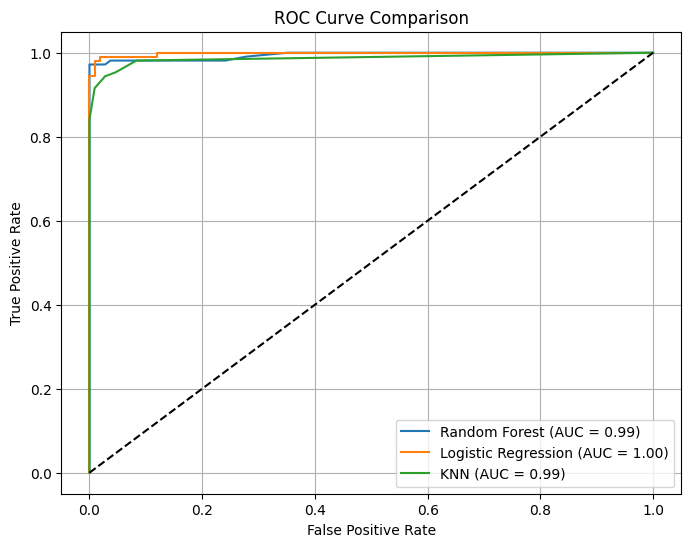

In [ ]:
plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["auc"]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


This cell generates and displays confusion matrices for each model, showing how predictions are distributed across classes.


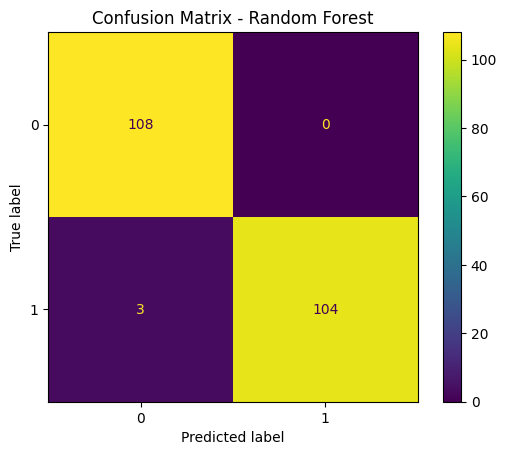

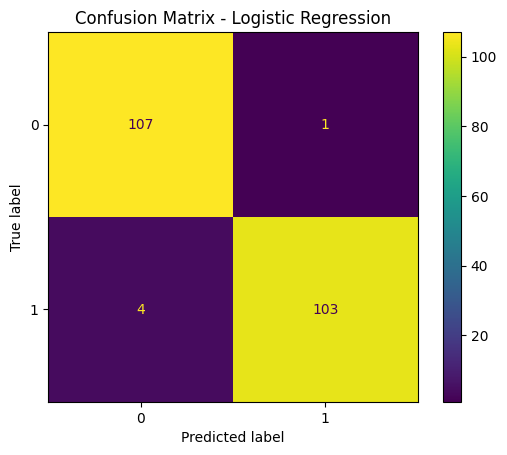

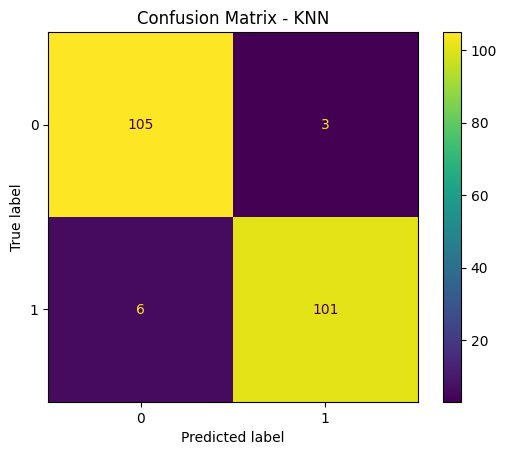

In [ ]:
for name, res in results.items():
    disp = ConfusionMatrixDisplay.from_estimator(res['model'], X_test, y_test)
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()


This cell extracts and plots the top 10 most important features according to the Random Forest model for interpretability.


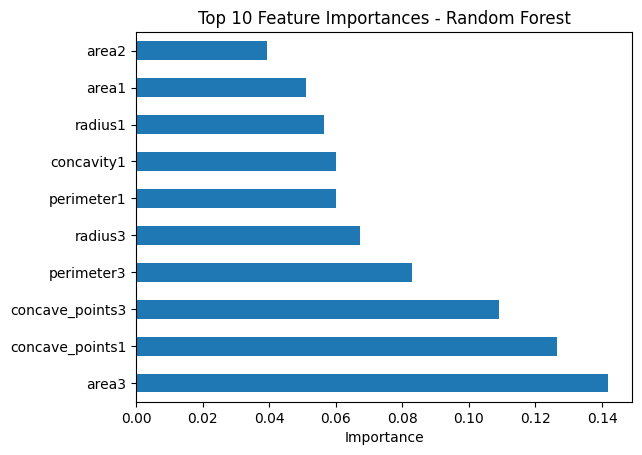

In [14]:

rf = results['Random Forest']['model']
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

This cell creates a summary table comparing the AUC scores and cross-validation results of all trained models.

In [15]:

summary_df = pd.DataFrame({
    name: {
        'AUC': res['auc'],
        'CV AUC': res['cv_auc']
    } for name, res in results.items()
}).T

print("\n\n Confronto Modelli:")
print(summary_df)




 Confronto Modelli:
                          AUC    CV AUC
Random Forest        0.994332  0.996707
Logistic Regression  0.998356  0.995147
KNN                  0.986847  0.997047


This cell performs hyperparameter tuning on the Logistic Regression model using GridSearchCV to optimize its parameters.


In [16]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

This final cell prints out which model achieved the highest AUC score, concluding the analysis.


In [17]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


This cell automatically identifies the best-performing model based on the AUC score.  

In [18]:

#  Conclusione automatica
best_model = max(results.items(), key=lambda x: x[1]['auc'])
print(f"\n The best model is: {best_model[0]} with AUC = {best_model[1]['auc']:.3f}")



 The best model is: Logistic Regression with AUC = 0.998
